# MA models with statsmodels

In [14]:
# imports
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt

## define a MA(1) process

$$
z_{t} = \varepsilon_{t} + \theta  \varepsilon_{t-1} 
$$


In [3]:
theta = np.array([.4])
ar = np.r_[1] # the coefficient on $z_t$
ma = np.r_[1, theta] 
ma_process = ArmaProcess(ar, ma)

In [4]:
type(ma_process)

statsmodels.tsa.arima_process.ArmaProcess

In [6]:
print(ma_process)

ArmaProcess
AR: [1.0]
MA: [1.0, 0.4]


In [8]:
# get a list of the (public) attributes of ma_process

In [5]:
[x for x in dir(ma_process) if not x.startswith('__')]

['acf',
 'acovf',
 'ar',
 'arcoefs',
 'arma2ar',
 'arma2ma',
 'arpoly',
 'arroots',
 'from_coeffs',
 'from_estimation',
 'from_roots',
 'generate_sample',
 'impulse_response',
 'invertroots',
 'isinvertible',
 'isstationary',
 'ma',
 'macoefs',
 'mapoly',
 'maroots',
 'nobs',
 'pacf',
 'periodogram']

In [11]:
# what is the difference between acf and acovf?

In [9]:
?ma_process.acf

Signature: ma_process.acf(lags=None)
Docstring:
Theoretical autocorrelation function of an ARMA process.

Parameters
----------
lags : int
    The number of terms (lags plus zero lag) to include in returned acf.

Returns
-------
ndarray
    The autocorrelations of ARMA process given by ar and ma.

See Also
--------
arma_acovf
    Autocovariances from ARMA processes.
acf
    Sample autocorrelation function estimation.
acovf
    Sample autocovariance function estimation.
File:      c:\users\eeu227\appdata\local\continuum\anaconda3\envs\teaching\lib\site-packages\statsmodels\tsa\arima_process.py
Type:      method


In [10]:
?ma_process.acovf

Signature: ma_process.acovf(nobs=None)
Docstring:
Theoretical autocovariances of stationary ARMA processes

Parameters
----------
nobs : int
    The number of terms (lags plus zero lag) to include in returned acovf.

Returns
-------
ndarray
    The autocovariance of ARMA process given by ar, ma.

See Also
--------
arma_acf
    Autocorrelation function for ARMA processes.
acovf
    Sample autocovariance estimation.

References
----------
.. [*] Brockwell, Peter J., and Richard A. Davis. 2009. Time Series:
    Theory and Methods. 2nd ed. 1991. New York, NY: Springer.
File:      c:\users\eeu227\appdata\local\continuum\anaconda3\envs\teaching\lib\site-packages\statsmodels\tsa\arima_process.py
Type:      method


In [6]:
ma_process.acovf(10)

array([5., 2., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
ma_process.acf(10)

array([1. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [15]:
ma_process.isinvertible

True

Text(0.5, 1.0, 'Theoretical autocovariances')

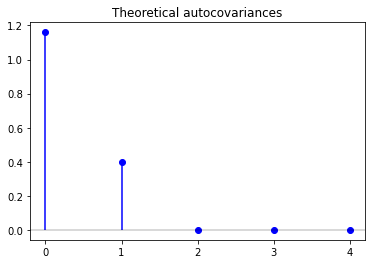

In [16]:
nlags = 5

lags = np.arange(nlags)
acovf_x = ma_process.acovf(nlags)

fig, ax = plt.subplots()
ax.vlines(lags, [0], acovf_x, color='b')
ax.scatter(lags, acovf_x, marker='o', c='b')
ax.axhline(color='black', linewidth=.3)
ax.set_xticks(lags)
ax.set_title('Theoretical autocovariances')

In [38]:
z = ma_process.generate_sample(100)

def plot_sample(z, process_name):

    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(z, c='black')
    ax.set_xlabel('time', fontsize=16)
    ax.set_title(f'{process_name}', fontsize=18)

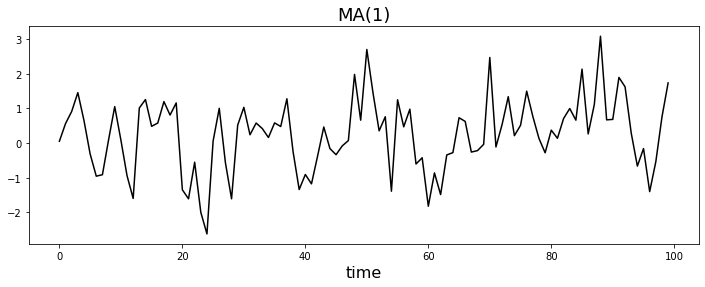

In [39]:
plot_sample(z, process_name='MA(1)')

''

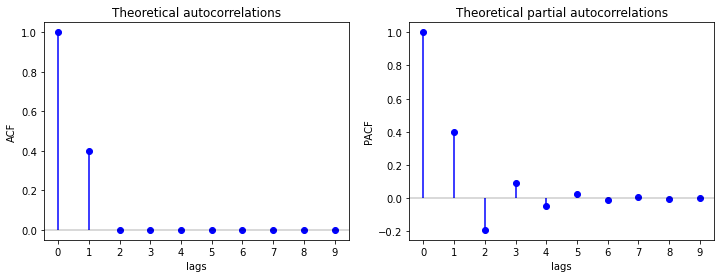

In [71]:
nlags = 10

lags = np.arange(nlags)
acf_x = ma_process.acf(nlags)
pacf_x = ma_process.pacf(nlags)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.vlines(lags, [0], acf_x, color='b')
ax1.scatter(lags, acf_x, marker='o', c='b')
ax1.axhline(color='black', linewidth=.3)
ax1.set_xticks(lags)
ax1.set_xlabel('lags')
ax1.set_ylabel('ACF')
ax1.set_title('Theoretical autocorrelations')

ax2.vlines(lags, [0], pacf_x, color='b')
ax2.scatter(lags, pacf_x, marker='o', c='b')
ax2.axhline(color='black', linewidth=.3)
ax2.set_xticks(lags)
ax2.set_xlabel('lags')
ax2.set_ylabel('PACF')
ax2.set_title('Theoretical partial autocorrelations')
;

In [7]:
type(ARIMA)

type

In [3]:
ar_model = ARIMA

In [5]:
ar_model.acovf()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
url = 'https://raw.githubusercontent.com/jlevendi/Time-Series-Econometrics/master/book%20data%20for%20distribution/CSV_data/MAexamples.csv'
df = pd.read_csv(filepath_or_buffer=url, sep='\t', index_col=0)
data = df['X'].values

In [22]:
data

array([-0.49677348,  0.57997056,  0.47650595, ..., -0.92384487,
       -1.00005374, -0.59472139])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -4230.101
Date:                Fri, 04 Feb 2022   AIC                           8464.202
Time:                        18:37:38   BIC                           8476.214
Sample:                             0   HQIC                          8468.523
                               - 3000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5120      0.016     32.260      0.000       0.481       0.543
sigma2         0.9822      0.025     38.792      0.000       0.933       1.032
Ljung-Box (L1) (Q):                   0.77   Jarque-

In [3]:
np.random.seed(12345)

In [8]:
maparams = np.array([2])
ar = np.r_[1]
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

arma_process.isstationary

True

In [9]:
arma_process.isinvertible

False

In [10]:
arma_process = sm.tsa.ArmaProcess.from_coeffs(.4, maparams)
arma_process.arroots

array([2.5])

In [13]:
arma_process.acovf(5)

array([7.85714286, 5.14285714, 2.05714286, 0.82285714, 0.32914286])